In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nibabel as nib
from nibabel.testing import data_path

In [160]:
metadata = pd.read_csv('Test-Images-Clinical-Details.csv')

In [161]:
metadata

,SIRM Case,Slice position in .nii.gz,Patient age,Patient Sex (Male = 0 Female = 1),Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,60.0,80.0,0.0,NaN,NaN,NaN
1,2,2.0,62.0,0.0,NaN,NaN,NaN
2,2,89.0,NaN,NaN,NaN,NaN,NaN
3,3,72.0,57.0,0.0,NaN,NaN,NaN
4,3,70.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SIRM Case                          101 non-null    object 
 1   Slice position in .nii.gz          101 non-null    float64
 2   Patient age                        41 non-null     float64
 3   Patient Sex (Male = 0 Female = 1)  39 non-null     float64
 4   Unnamed: 4                         1 non-null      float64
 5   Unnamed: 5                         1 non-null      float64
 6   Unnamed: 6                         1 non-null      float64
dtypes: float64(6), object(1)
memory usage: 5.9+ KB


In [163]:
metadata.tail(6)

,SIRM Case,Slice position in .nii.gz,Patient age,Patient Sex (Male = 0 Female = 1),Unnamed: 4,Unnamed: 5,Unnamed: 6
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,Not used,48.0,35.0,26.0,20.0,15.0,12.0


w 105 wierszy widać dziwne dane nie pasujące do pozostałych w tabelce, odrzucamy wiersz. Wiersze 100-104 nie zawierają żadnych informacji.

Kolumny Unnamed nie mają żadnych danych w wierszach innych niż ostatni, je też odrzucamy, nie widaomo do czego służą.

In [164]:
metadata = metadata.drop([100, 101, 102, 103, 104, 105], axis=0)
metadata = metadata.drop(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1)

In [165]:
metadata.shape

(100, 4)

In [166]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SIRM Case                          100 non-null    object 
 1   Slice position in .nii.gz          100 non-null    float64
 2   Patient age                        40 non-null     float64
 3   Patient Sex (Male = 0 Female = 1)  38 non-null     float64
dtypes: float64(3), object(1)
memory usage: 3.9+ KB


In [167]:
u = metadata['SIRM Case'].unique()
u

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '13',
       '14', '16', '17', '18', '19', '21', '22', '23', '24', '25', '27',
       '28', '29', '30', '31', '32', '33', '34', '36', '37', '38', '39',
       '40', '41', '42', '43', '44', '45', '46', '47', '49'], dtype=object)

Mamy 49 unikalnych przypadków, prawdopodobnie oznacza to, że tylu mamy pacjentów, chyba że u jednego pacjenta jest więcej niż jedna zmiana. Wszyscy pacjenci mają zmiany w płucach

In [168]:
metadata['Slice position in .nii.gz'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96., 97., 98., 99.])

kolumna Slice position in .nii.gz mówi ma którym zdjęciu znajduje się pacjent

In [169]:
metadata['Patient Sex (Male = 0 Female = 1)'].value_counts()

0.0    27
1.0    11
Name: Patient Sex (Male = 0 Female = 1), dtype: int64

In [170]:
d = {
    1.0 : 'Female',
    0.0 : 'Male'
}

In [171]:
metadata['Patient Sex (Male = 0 Female = 1)'].replace(d, inplace=True)

In [172]:
sex = metadata['Patient Sex (Male = 0 Female = 1)'].value_counts().to_frame().reset_index()
sex.columns = ['sex', 'count']
sex

,sex,count
0,Male,27
1,Female,11


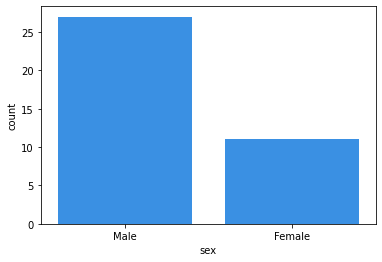

In [173]:
sns.barplot(data = sex, x = 'sex', y = 'count', color='dodgerblue')
plt.show()

Informacje o płci mamy w 38 wierszach.

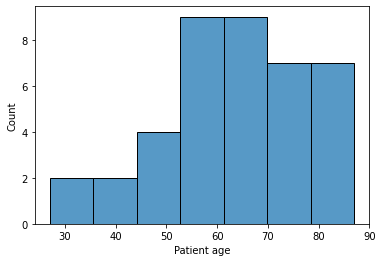

In [174]:
sns.histplot(metadata['Patient age'])
plt.show()

W 40 na 100 wierszy mamy informacje o wieku, pacjenci to głównie ludzie starsi.

# zdjęcia

In [175]:
#example_ni1 = os.path.join(data_path, 'example4d.nii.gz')

nifiti_img = nib.load('tr_im.nii')

nifiti_img

In [176]:
print(nifiti_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 512 512 100   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [0. 0. 0. 0.]
srow_y          : [0. 0

In [177]:
imgs = nifiti_img.get_fdata()

imgs.shape

(512, 512, 100)

In [178]:
imgs[1]

memmap([[-1408.5106383 , -1472.14320194,  -995.66581778, ...,
         -1353.57142857, -1399.29577465, -1346.15384615],
        [-1408.5106383 , -1457.95137003,  -995.66590189, ...,
         -1353.57142857, -1399.29577465, -1346.15384615],
        [-1408.5106383 , -1456.75001857,  -996.36603529, ...,
         -1353.57142857, -1399.29577465, -1346.15384615],
        ...,
        [-1408.5106383 , -1474.51494082, -1018.54053668, ...,
         -1352.61162155, -1399.29577465, -1346.15384615],
        [-1408.5106383 , -1476.20743522, -1015.47805638, ...,
         -1353.57139848, -1399.29577465, -1346.15384615],
        [-1408.5106383 , -1477.69007278, -1014.60699888, ...,
         -1353.57142857, -1399.29577465, -1346.15384615]])

In [179]:
metadata.head(20)

,SIRM Case,Slice position in .nii.gz,Patient age,Patient Sex (Male = 0 Female = 1)
0,1,60.0,80.0,Male
1,2,2.0,62.0,Male
2,2,89.0,NaN,NaN
3,3,72.0,57.0,Male
4,3,70.0,NaN,NaN
5,4,68.0,45.0,Male
6,4,92.0,NaN,NaN
7,5,88.0,64.0,Male
8,5,66.0,NaN,NaN
9,6,23.0,32.0,Female


Poniżej zdjęcie 80-letniego mężczyzny

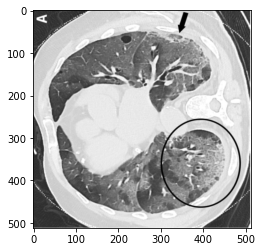

In [180]:
plt.imshow(imgs[:,:,60],cmap="gray")

A tutaj 32 -letnia kobieta

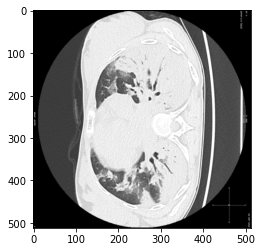

In [181]:
plt.imshow(imgs[:,:,23], cmap='gray')

na niektórych zdjęciach widać zaznaczoną zmiane:

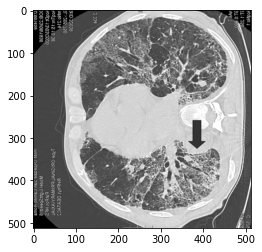

In [182]:
plt.imshow(imgs[:,:,1],cmap="gray")

In [183]:
metadata[metadata['Slice position in .nii.gz'] == 1]

,SIRM Case,Slice position in .nii.gz,Patient age,Patient Sex (Male = 0 Female = 1)
98,49,1.0,84.0,Male


to jest 84 - letni mężczyzna

# Maski

In [184]:
masks = nib.load('tr_mask.nii')
masks_imgs = masks.get_fdata()

masks_imgs.shape

(512, 512, 100)

Dla każdego zdjęcia jest maska - potweirdza to, że wszyscy pacjeni mają zmiany w płuchach

Maski są rysowane na podstawie 3 wartości (typów zmian):

1 - ground-glass

2 - consolidation

3 - pleural effusion


zmiany płuc dla pierwszego zdjęcia, białe to zmiany typu 1, szare to typ 2

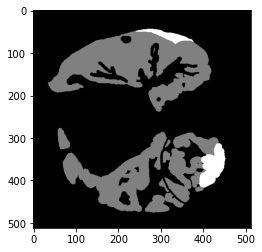

In [185]:
plt.imshow(masks_imgs[:,:,60],cmap="gray")

Zmiany dla drugiego zdjęcia - zawiera dwia takie same typy zmian

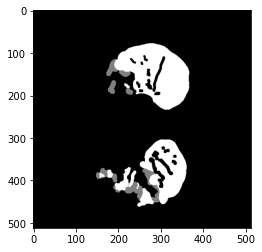

In [186]:
plt.imshow(masks_imgs[:,:,23], cmap='gray')